In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

import matplotlib.pyplot as plt





In [ ]:
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = data.iloc[:,2:32]
y = data['diagnosis']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Aplicando PCA sem normalização

In [ ]:
y_aux = y.to_numpy()


color = []


for i in range(len(y_aux)):
    if y_aux[i]=="M":
        color.append('red')
    else:
        color.append('blue')

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(X)

PCA(n_components=2)

In [ ]:
Xn_pca = pca.transform(X)

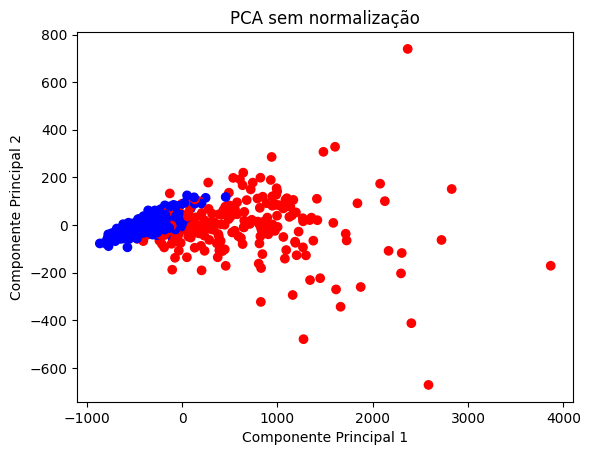

In [ ]:
x_pl = Xn_pca[:,0]
y_pl = Xn_pca[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA sem normalização')

plt.show()

## MDS sem normalização

In [ ]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
Xn_mds = mds.fit_transform(X)

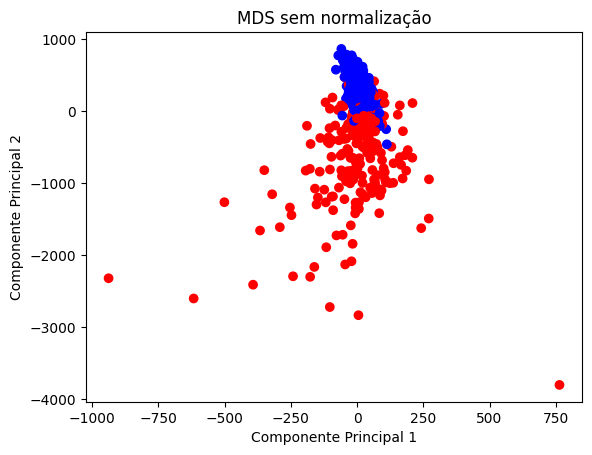

In [ ]:
x_pl = Xn_mds[:,0]
y_pl = Xn_mds[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS sem normalização')

plt.show()

## STD + PCA



In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

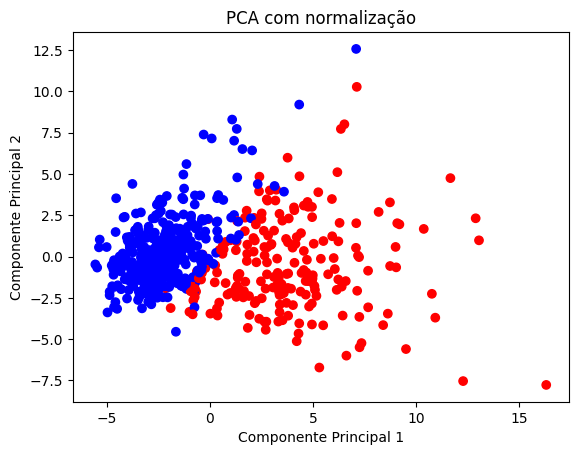

In [ ]:
x_pl = X_pca[:,0]
y_pl = X_pca[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA com normalização')

plt.show()

## STD + MDS

In [ ]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
X_mds = mds.fit_transform(X_scaled)

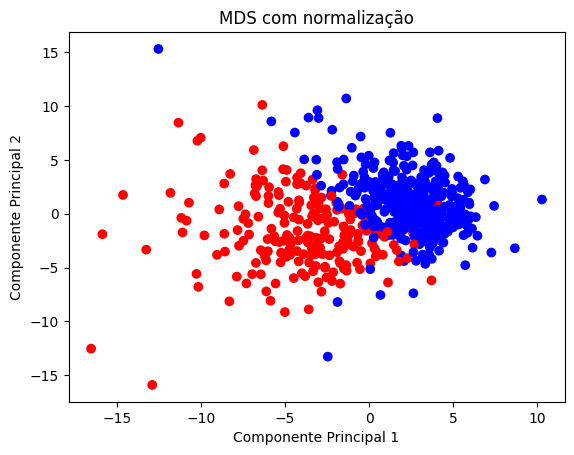

In [ ]:
x_pl = X_mds[:,0]
y_pl = X_mds[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS com normalização')

plt.show()

## PCA + STD

In [ ]:
Xn_pca_scaled = scaler.fit_transform(Xn_pca)

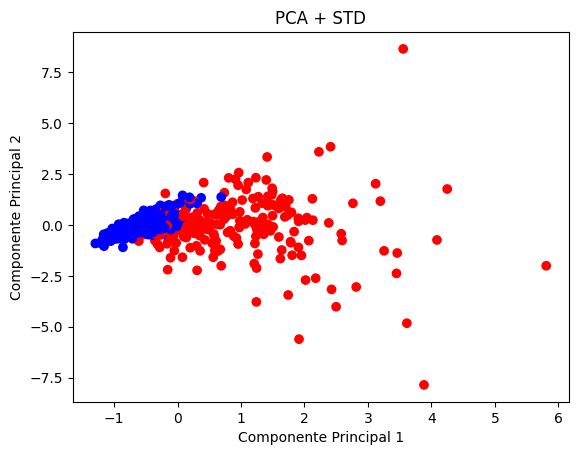

In [ ]:
x_pl = Xn_pca_scaled[:,0]
y_pl = Xn_pca_scaled[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA + STD')

plt.show()

## PCA + MDS

In [ ]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
Xn_pca_mds = mds.fit_transform(Xn_pca)

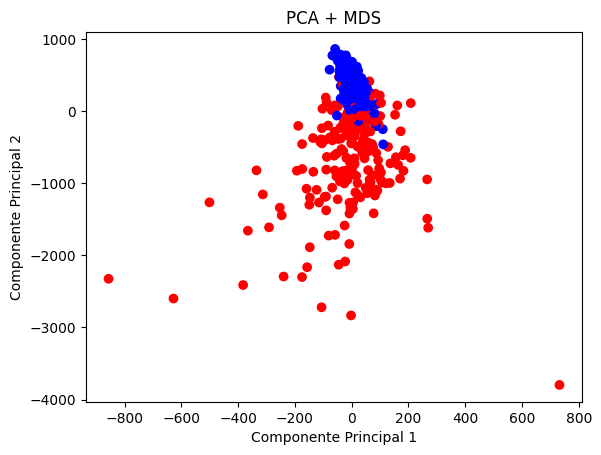

In [ ]:
x_pl = Xn_pca_mds[:,0]
y_pl = Xn_pca_mds[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA + MDS')

plt.show()

## MDS + PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(Xn_mds)
Xn_mds_pca = pca.transform(Xn_mds)

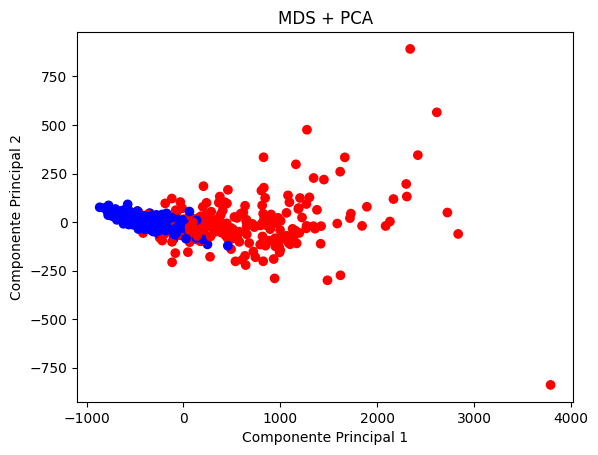

In [ ]:
x_pl = Xn_mds_pca[:,0]
y_pl = Xn_mds_pca[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS + PCA')

plt.show()

## MDS + STD

In [ ]:
Xn_mds_scaled = scaler.fit_transform(Xn_mds)

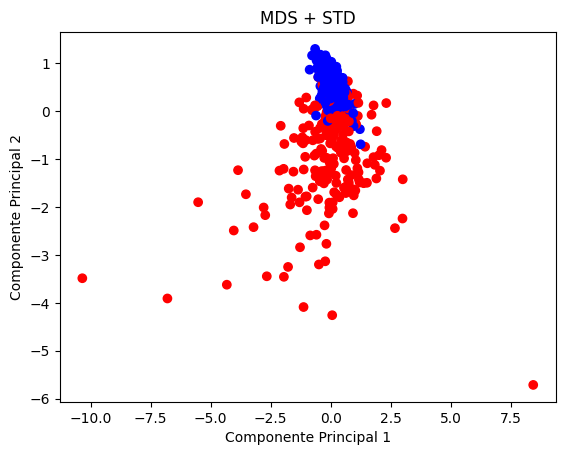

In [ ]:
x_pl = Xn_mds_scaled[:,0]
y_pl = Xn_mds_scaled[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS + STD')

plt.show()

## STD + PCA + MDS


In [ ]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
X_pca_mds = mds.fit_transform(X_pca)

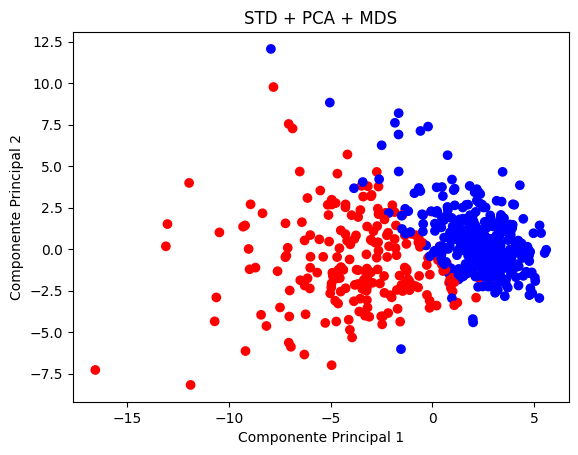

In [ ]:
x_pl = X_pca_mds[:,0]
y_pl = X_pca_mds[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('STD + PCA + MDS')

plt.show()

## STD + MDS + PCA


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_mds)
X_mds_pca = pca.transform(X_mds)

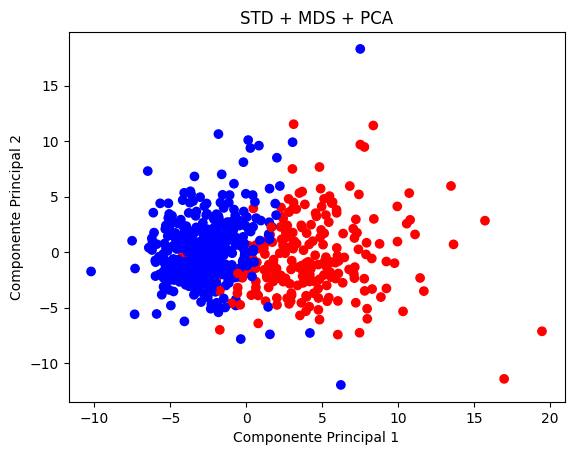

In [ ]:
x_pl = X_mds_pca[:,0]
y_pl = X_mds_pca[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('STD + MDS + PCA')

plt.show()

## PCA + STD + MDS



In [ ]:
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
Xn_pca_scaled_mds = mds.fit_transform(Xn_pca_scaled)

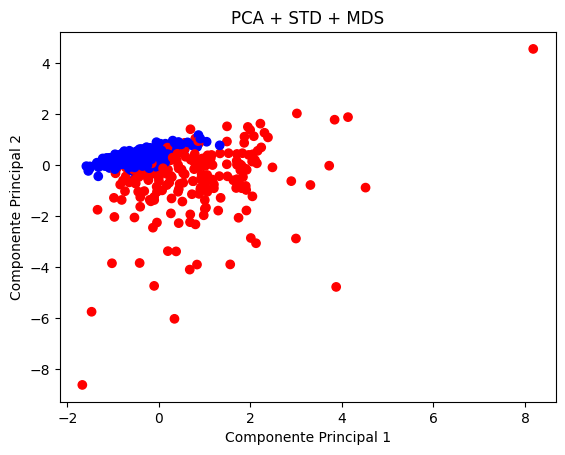

In [ ]:
x_pl = Xn_pca_scaled_mds[:,0]
y_pl = Xn_pca_scaled_mds[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA + STD + MDS')

plt.show()

## PCA + MDS + STD


In [ ]:
Xn_pca_mds_scaled = scaler.fit_transform(Xn_pca_mds)

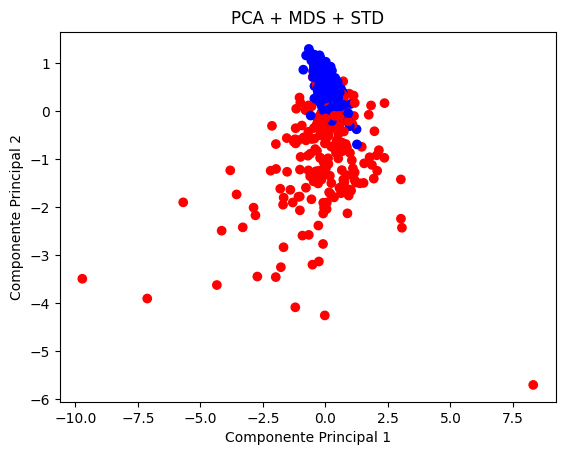

In [ ]:
x_pl = Xn_pca_mds_scaled[:,0]
y_pl = Xn_pca_mds_scaled[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('PCA + MDS + STD')

plt.show()

## MDS + STD + PCA


In [ ]:
pca = PCA(n_components=2)
pca.fit(Xn_mds_scaled)
Xn_mds_scaled_pca = pca.transform(Xn_mds_scaled)

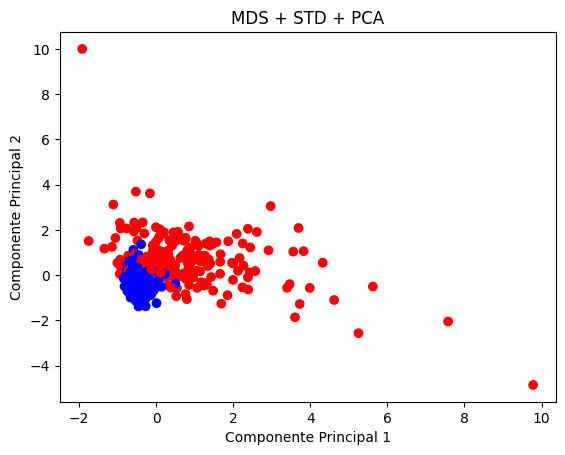

In [ ]:
x_pl = Xn_mds_scaled_pca[:,0]
y_pl = Xn_mds_scaled_pca[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS + STD + PCA')

plt.show()

## MDS + PCA + STD


In [ ]:
Xn_mds_pca_scaled = scaler.fit_transform(Xn_mds_pca)

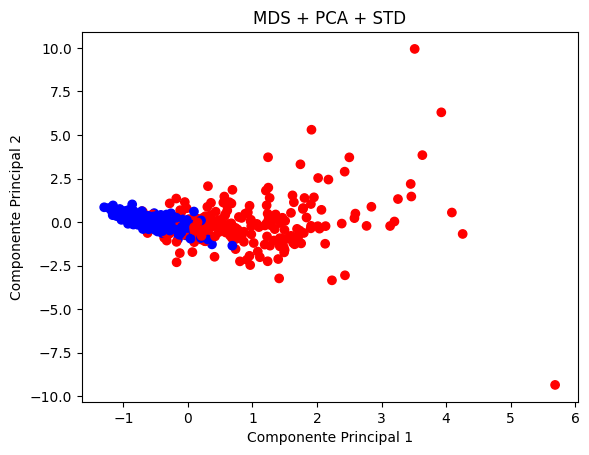

In [ ]:
x_pl = Xn_mds_pca_scaled[:,0]
y_pl = Xn_mds_pca_scaled[:,1]

plt.scatter(x_pl,y_pl, c=color)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.title('MDS + PCA + STD')

plt.show()

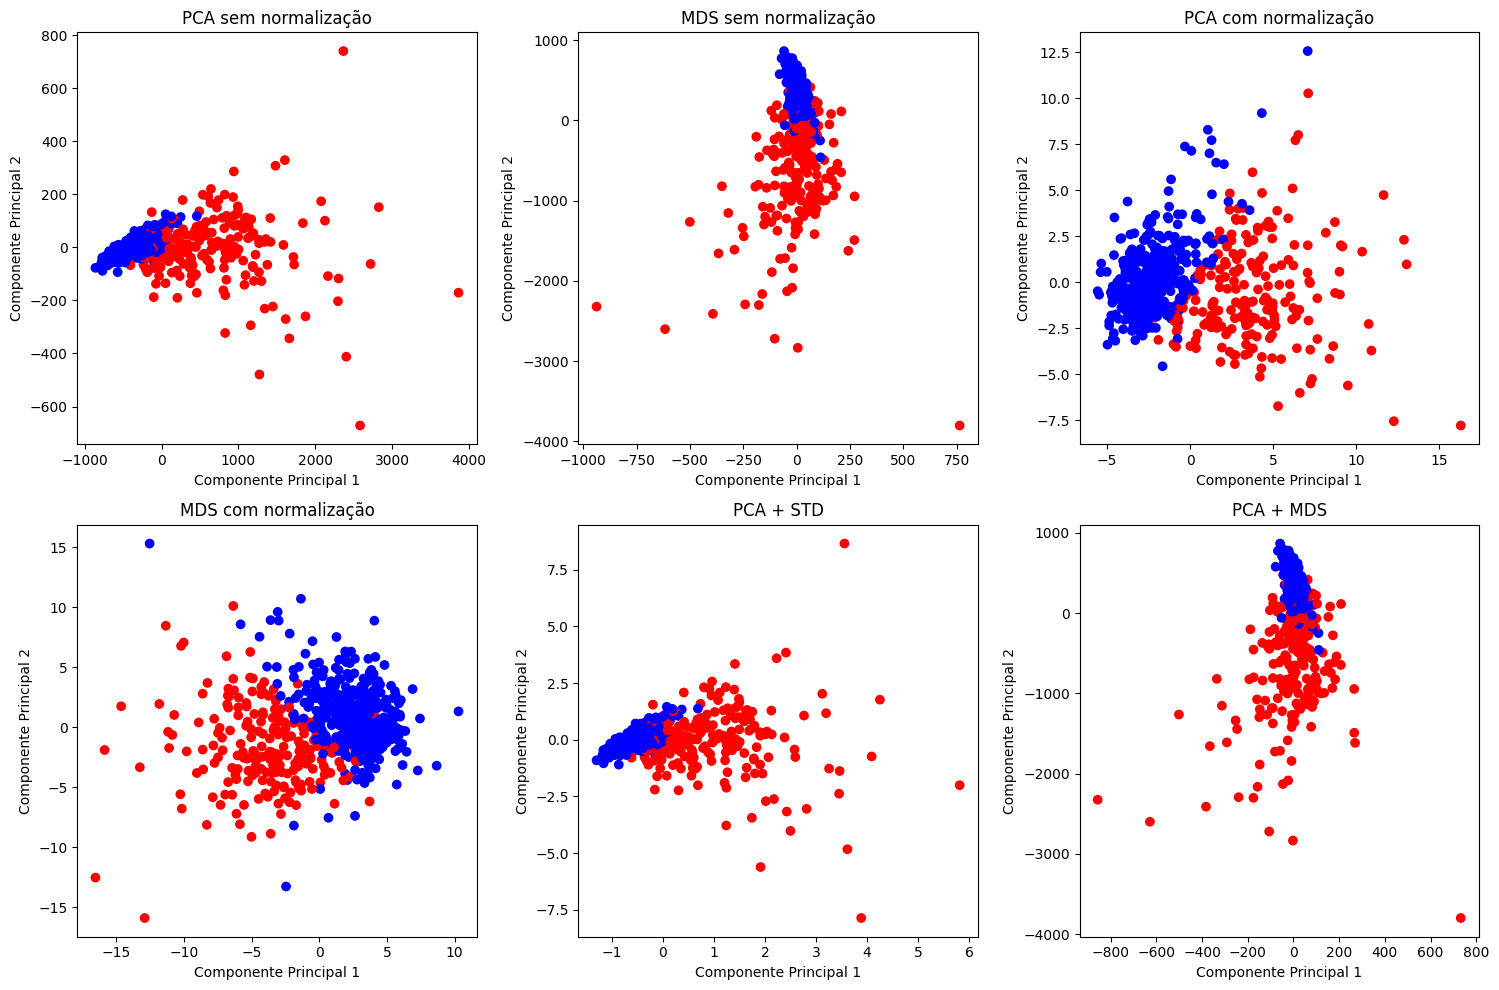

In [ ]:
# Crie uma figura e uma grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#01 - PCA
x_pl = Xn_pca[:,0]
y_pl = Xn_pca[:,1]

axes[0][0].scatter(x_pl, y_pl, c=color)
axes[0][0].set_xlabel('Componente Principal 1')
axes[0][0].set_ylabel('Componente Principal 2')
axes[0][0].set_title('PCA sem normalização')

# 02 - MDS sem normalização
x_pl = Xn_mds[:, 0]
y_pl = Xn_mds[:, 1]
axes[0][1].scatter(x_pl, y_pl, c=color)
axes[0][1].set_xlabel('Componente Principal 1')
axes[0][1].set_ylabel('Componente Principal 2')
axes[0][1].set_title('MDS sem normalização')

# 03 - PCA com normalização
x_pl = X_pca[:, 0]
y_pl = X_pca[:, 1]
axes[0][2].scatter(x_pl, y_pl, c=color)
axes[0][2].set_xlabel('Componente Principal 1')
axes[0][2].set_ylabel('Componente Principal 2')
axes[0][2].set_title('PCA com normalização')

# 04 - MDS com normalização
x_pl = X_mds[:, 0]
y_pl = X_mds[:, 1]
axes[1][0].scatter(x_pl, y_pl, c=color)
axes[1][0].set_xlabel('Componente Principal 1')
axes[1][0].set_ylabel('Componente Principal 2')
axes[1][0].set_title('MDS com normalização')

#05 - pca + std
x_pl = Xn_pca_scaled[:,0]
y_pl = Xn_pca_scaled[:,1]
axes[1][1].scatter(x_pl,y_pl, c=color)
axes[1][1].set_xlabel('Componente Principal 1')
axes[1][1].set_ylabel('Componente Principal 2')
axes[1][1].set_title('PCA + STD')

#06 - pca + mds
x_pl = Xn_pca_mds[:,0]
y_pl = Xn_pca_mds[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('PCA + MDS')

#07 - mds + pca
x_pl = Xn_mds_pca[:,0]
y_pl = Xn_mds_pca[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('MDS + PCA')

#08 - MDS + STD
x_pl = Xn_mds_scaled[:,0]
y_pl = Xn_mds_scaled[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('MDS + STD')

#09 - STD + PCA + MDS
x_pl = X_pca_mds[:,0]
y_pl = X_pca_mds[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('STD + PCA + MDS')

#10 - STD + MDS + PCA
x_pl = X_mds_pca[:,0]
y_pl = X_mds_pca[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('STD + MDS + PCA')

#11 - PCA + STD + MDS
x_pl = Xn_pca_scaled_mds[:,0]
y_pl = Xn_pca_scaled_mds[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('PCA + STD + MDS')

#12 - PCA + MDS + STD
x_pl = Xn_pca_mds_scaled[:,0]
y_pl = Xn_pca_mds_scaled[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('PCA + MDS + STD')

#13 - MDS + STD + PCA
x_pl = Xn_mds_scaled_pca[:,0]
y_pl = Xn_mds_scaled_pca[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('MDS + STD + PCA')

#14 - MDS + PCA + STD
x_pl = Xn_mds_pca_scaled[:,0]
y_pl = Xn_mds_pca_scaled[:,1]
axes[1][2].scatter(x_pl,y_pl, c=color)
axes[1][2].set_xlabel('Componente Principal 1')
axes[1][2].set_ylabel('Componente Principal 2')
axes[1][2].set_title('MDS + PCA + STD')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exiba a figura
plt.show()


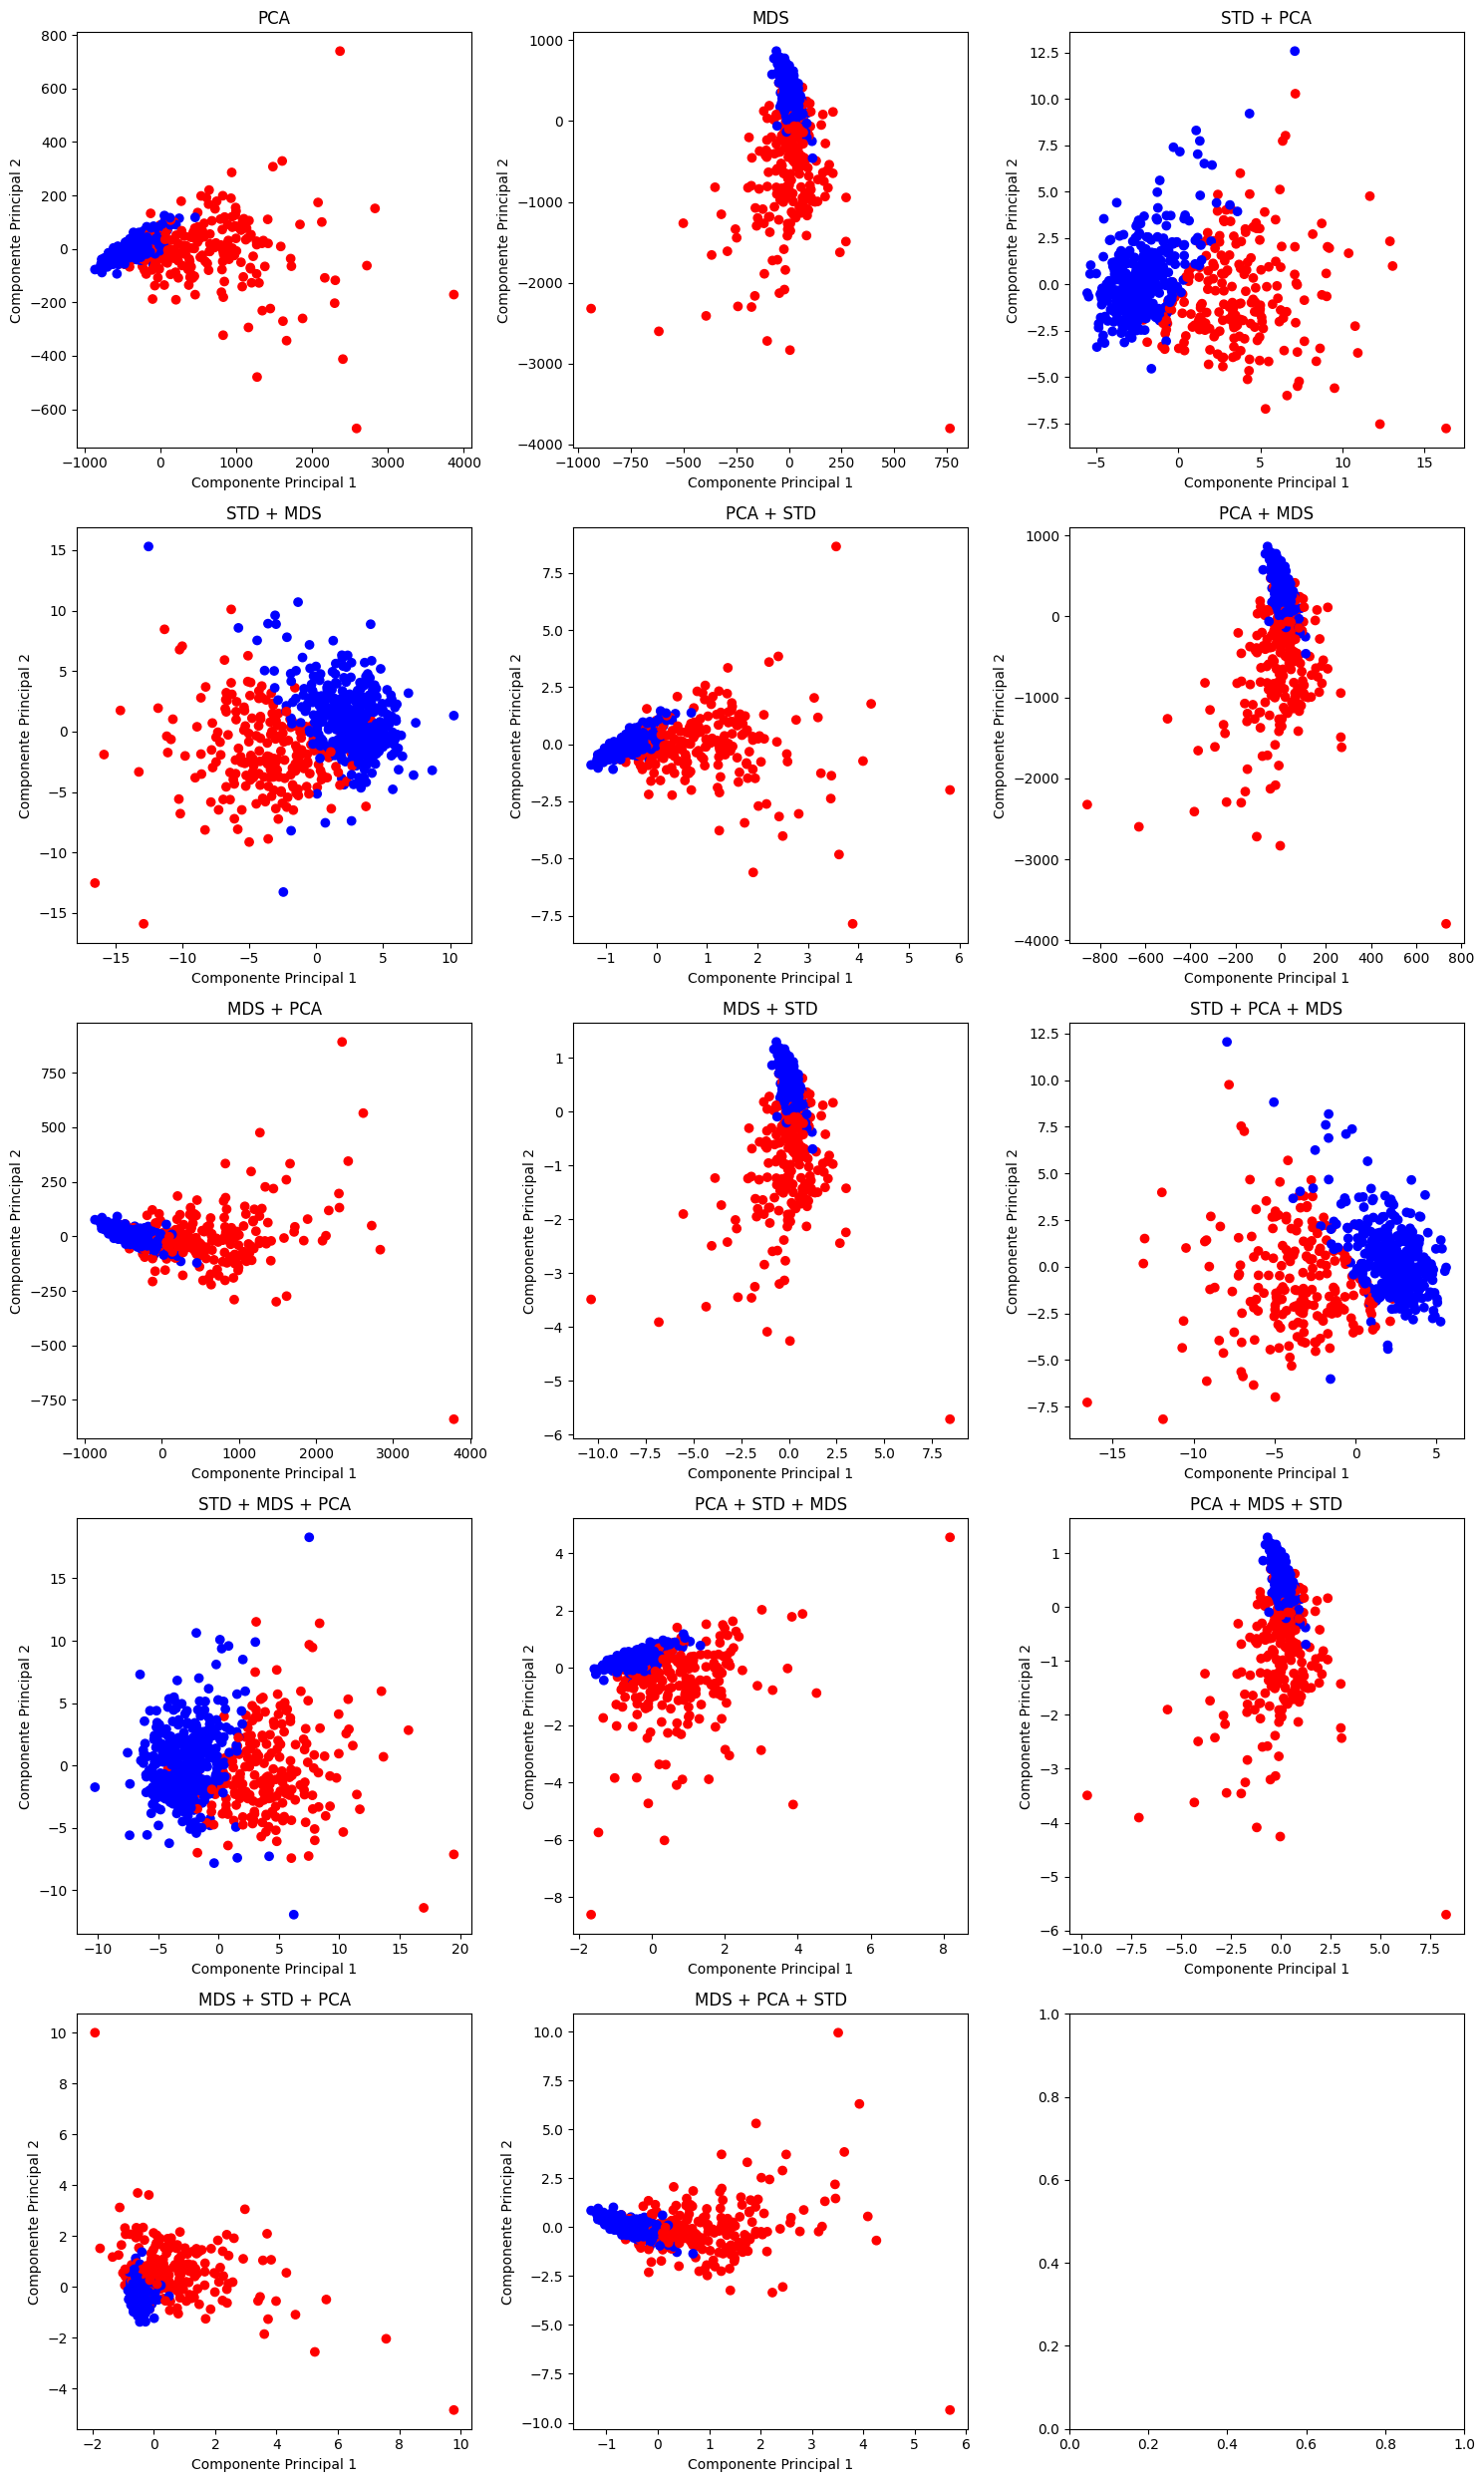

In [ ]:
# Crie uma figura e uma grade de subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

# 01 - PCA sem normalização
x_pl = Xn_pca[:, 0]
y_pl = Xn_pca[:, 1]
axes[0, 0].scatter(x_pl, y_pl, c=color)
axes[0, 0].set_xlabel('Componente Principal 1')
axes[0, 0].set_ylabel('Componente Principal 2')
axes[0, 0].set_title('PCA')

# 02 - MDS sem normalização
x_pl = Xn_mds[:, 0]
y_pl = Xn_mds[:, 1]
axes[0, 1].scatter(x_pl, y_pl, c=color)
axes[0, 1].set_xlabel('Componente Principal 1')
axes[0, 1].set_ylabel('Componente Principal 2')
axes[0, 1].set_title('MDS')

# 03 - PCA com normalização
x_pl = X_pca[:, 0]
y_pl = X_pca[:, 1]
axes[0, 2].scatter(x_pl, y_pl, c=color)
axes[0, 2].set_xlabel('Componente Principal 1')
axes[0, 2].set_ylabel('Componente Principal 2')
axes[0, 2].set_title('STD + PCA')

# 04 - MDS com normalização
x_pl = X_mds[:, 0]
y_pl = X_mds[:, 1]
axes[1, 0].scatter(x_pl, y_pl, c=color)
axes[1, 0].set_xlabel('Componente Principal 1')
axes[1, 0].set_ylabel('Componente Principal 2')
axes[1, 0].set_title('STD + MDS')

# 05 - PCA + STD
x_pl = Xn_pca_scaled[:, 0]
y_pl = Xn_pca_scaled[:, 1]
axes[1, 1].scatter(x_pl, y_pl, c=color)
axes[1, 1].set_xlabel('Componente Principal 1')
axes[1, 1].set_ylabel('Componente Principal 2')
axes[1, 1].set_title('PCA + STD')

# 06 - PCA + MDS
x_pl = Xn_pca_mds[:, 0]
y_pl = Xn_pca_mds[:, 1]
axes[1, 2].scatter(x_pl, y_pl, c=color)
axes[1, 2].set_xlabel('Componente Principal 1')
axes[1, 2].set_ylabel('Componente Principal 2')
axes[1, 2].set_title('PCA + MDS')

# 07 - MDS + PCA
x_pl = Xn_mds_pca[:, 0]
y_pl = Xn_mds_pca[:, 1]
axes[2, 0].scatter(x_pl, y_pl, c=color)
axes[2, 0].set_xlabel('Componente Principal 1')
axes[2, 0].set_ylabel('Componente Principal 2')
axes[2, 0].set_title('MDS + PCA')

# 08 - MDS + STD
x_pl = Xn_mds_scaled[:, 0]
y_pl = Xn_mds_scaled[:, 1]
axes[2, 1].scatter(x_pl, y_pl, c=color)
axes[2, 1].set_xlabel('Componente Principal 1')
axes[2, 1].set_ylabel('Componente Principal 2')
axes[2, 1].set_title('MDS + STD')

# 09 - STD + PCA + MDS
x_pl = X_pca_mds[:, 0]
y_pl = X_pca_mds[:, 1]
axes[2, 2].scatter(x_pl, y_pl, c=color)
axes[2, 2].set_xlabel('Componente Principal 1')
axes[2, 2].set_ylabel('Componente Principal 2')
axes[2, 2].set_title('STD + PCA + MDS')

# 10 - STD + MDS + PCA
x_pl = X_mds_pca[:, 0]
y_pl = X_mds_pca[:, 1]
axes[3, 0].scatter(x_pl, y_pl, c=color)
axes[3, 0].set_xlabel('Componente Principal 1')
axes[3, 0].set_ylabel('Componente Principal 2')
axes[3, 0].set_title('STD + MDS + PCA')

# 11 - PCA + STD + MDS
x_pl = Xn_pca_scaled_mds[:, 0]
y_pl = Xn_pca_scaled_mds[:, 1]
axes[3, 1].scatter(x_pl, y_pl, c=color)
axes[3, 1].set_xlabel('Componente Principal 1')
axes[3, 1].set_ylabel('Componente Principal 2')
axes[3, 1].set_title('PCA + STD + MDS')

# 12 - PCA + MDS + STD
x_pl = Xn_pca_mds_scaled[:, 0]
y_pl = Xn_pca_mds_scaled[:, 1]
axes[3, 2].scatter(x_pl, y_pl, c=color)
axes[3, 2].set_xlabel('Componente Principal 1')
axes[3, 2].set_ylabel('Componente Principal 2')
axes[3, 2].set_title('PCA + MDS + STD')

# 13 - MDS + STD + PCA
x_pl = Xn_mds_scaled_pca[:, 0]
y_pl = Xn_mds_scaled_pca[:, 1]
axes[4, 0].scatter(x_pl, y_pl, c=color)
axes[4, 0].set_xlabel('Componente Principal 1')
axes[4, 0].set_ylabel('Componente Principal 2')
axes[4, 0].set_title('MDS + STD + PCA')

# 14 - MDS + PCA + STD
x_pl = Xn_mds_pca_scaled[:, 0]
y_pl = Xn_mds_pca_scaled[:, 1]
axes[4, 1].scatter(x_pl, y_pl, c=color)
axes[4, 1].set_xlabel('Componente Principal 1')
axes[4, 1].set_ylabel('Componente Principal 2')
axes[4, 1].set_title('MDS + PCA + STD')

# Ajuste o espaçamento entre os subplots
plt.tight_layout()

# Exiba a figura
plt.show()
